Visualisation of the working of **Linear Search** performed on a array

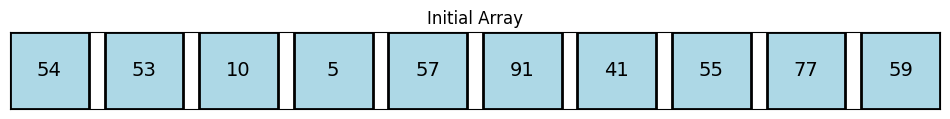


 Searching for 91 in array: [54, 53, 10, 5, 57, 91, 41, 55, 77, 59]



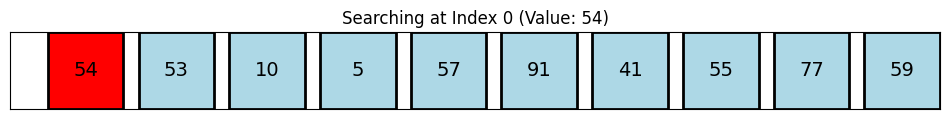

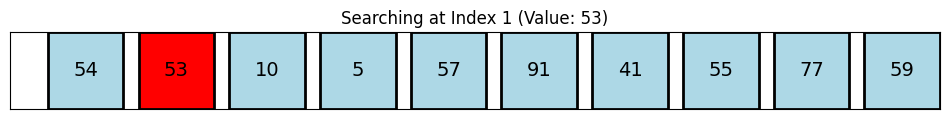

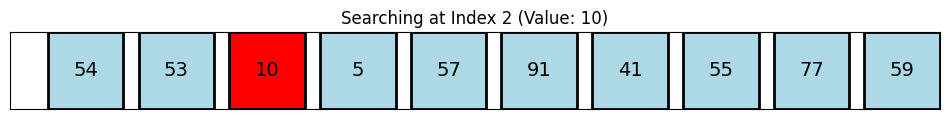

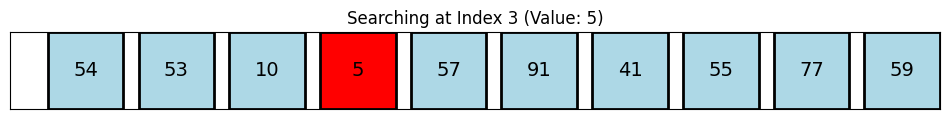

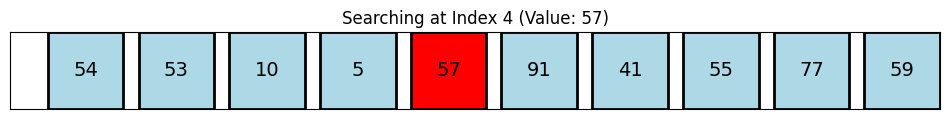

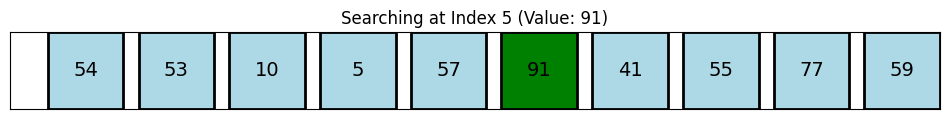

Target 91 found at index 5


⏳ BFS Search Time: 3192.8620 ms
Target 91 found! Search Path: 0 -> 1 -> 2 -> 3 -> 4 -> 5


In [ ]:
import time
import random
import matplotlib.pyplot as plt
from collections import deque

def bfs_search(array, target):
    """Performs BFS search on an array, allowing movement left and right."""
    n = len(array)
    queue = deque([0])  # Start from index 0
    visited = set()
    parent_map = {0: None}  # Track the path

    print(f"\n Searching for {target} in array: {array}\n")

    while queue:
        index = queue.popleft()
        found = array[index] == target
        visualize_search(array, index, found)  # Show each step with squares

        if found:
            print(f"Target {target} found at index {index}\n")
            return reconstruct_path(parent_map, index)  # Return search path

        if index not in visited:
            visited.add(index)

            # Move right (+1) if within bounds
            if index + 1 < n and (index + 1) not in visited:
                queue.append(index + 1)
                parent_map[index + 1] = index
            
            # Move left (-1) if within bounds
            if index - 1 >= 0 and (index - 1) not in visited:
                queue.append(index - 1)
                parent_map[index - 1] = index

    print(f"Target {target} not found.\n")
    return []

def reconstruct_path(parent_map, target_index):
    """Reconstructs the path from start to the target index."""
    path = []
    current = target_index
    while current is not None:
        path.append(current)
        current = parent_map[current]
    path.reverse()
    return path

def visualize_search(array, current_index, found):
    """Plots the array as perfect squares with clear boundaries."""
    square_size = 1.0  # Ensure squares remain equal in width and height
    spacing = 0.2  # Space between squares
    plt.figure(figsize=(len(array) * (square_size + spacing), 1))
    
    for i, value in enumerate(array):
        x = i * (square_size + spacing)  # Adjust position with spacing
        color = "lightblue"  # Default color
        if i == current_index:
            color = "green" if found else "red"  # Green if found, red if searching
        
        # Draw a square with a border
        plt.gca().add_patch(plt.Rectangle((x, 0), square_size, square_size, color=color, ec="black", lw=2))
        plt.text(x + square_size / 2, square_size / 2, str(value), ha="center", va="center", fontsize=14, color="black")

    plt.xlim(-0.5, len(array) * (square_size + spacing) - spacing)
    plt.ylim(0, square_size)
    plt.xticks([])  # Remove axis ticks
    plt.yticks([])
    plt.title(f"Searching at Index {current_index} (Value: {array[current_index]})")
    plt.show()
    time.sleep(0.5)  # Pause for visualization effect

# Generate a random array of 10 numbers from 1-100
array = random.sample(range(1, 101), 10)

# Plot initial array with clear boundaries
square_size = 1.0
spacing = 0.2
plt.figure(figsize=(len(array) * (square_size + spacing), 1))
for i, value in enumerate(array):
    x = i * (square_size + spacing)
    plt.gca().add_patch(plt.Rectangle((x, 0), square_size, square_size, color="lightblue", ec="black", lw=2))
    plt.text(x + square_size / 2, square_size / 2, str(value), ha="center", va="center", fontsize=14, color="black")

plt.xlim(0, len(array) * (square_size + spacing) - spacing)
plt.ylim(0, square_size)
plt.xticks([])
plt.yticks([])
plt.title("Initial Array")
plt.show()

# Allow user to enter the target number (can be outside the array)
while True:
    try:
        target = int(input(f"Enter a target number (can be any number): "))
        break
    except ValueError:
        print("Please enter a valid number.")

# Measure BFS search time
start_time = time.time()
search_path = bfs_search(array, target)
bfs_time = (time.time() - start_time) * 1000  # Convert to ms

# Print results
print(f"\n BFS Search Time: {bfs_time:.4f} ms")
if search_path:
    print(f"Target {target} found! Search Path: {' -> '.join(map(str, search_path))}")
else:
    print(f"Target {target} not found.")


Visualisation of the working of **Binary Search** performed on a array

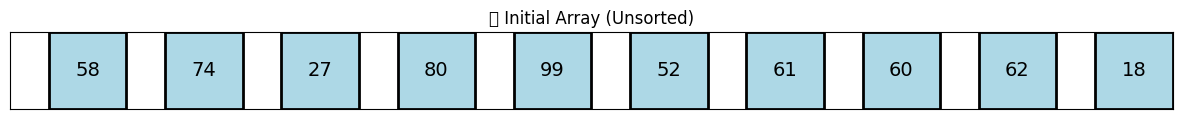

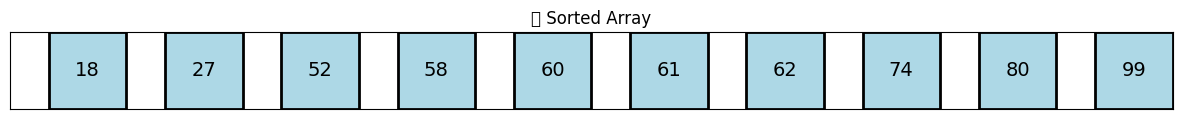


🔎 Searching for 62 in sorted array: [18, 27, 52, 58, 60, 61, 62, 74, 80, 99]



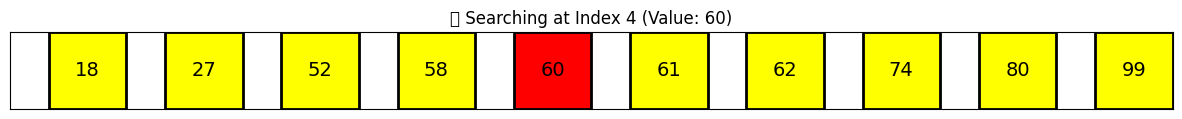

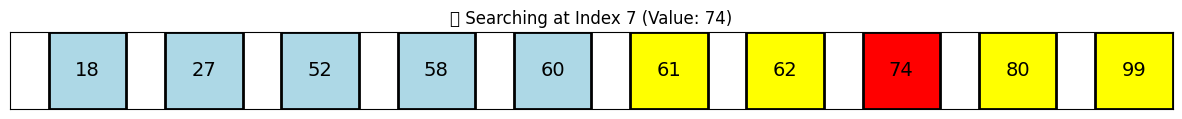

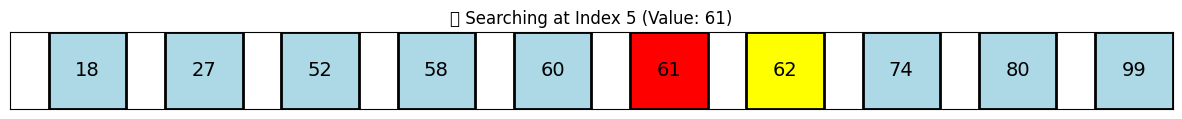

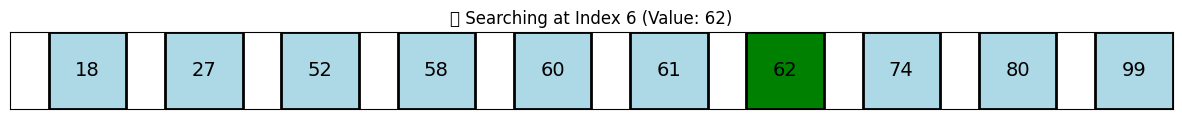

✅ Target 62 found at index 6


⏳ Binary Search Time: 2111.8035 ms
✅ Target 62 found at index 6 in sorted array.


In [8]:
import time
import random
import matplotlib.pyplot as plt

def binary_search_visual(array, target):
    """Performs Binary Search and visualizes each step."""
    left, right = 0, len(array) - 1

    print(f"\n🔎 Searching for {target} in sorted array: {array}\n")

    while left <= right:
        mid = (left + right) // 2
        found = array[mid] == target
        visualize_search(array, mid, left, right, found)

        if found:
            print(f"✅ Target {target} found at index {mid}\n")
            return mid  # Return the found index

        if array[mid] < target:
            left = mid + 1  # Move right
        else:
            right = mid - 1  # Move left

    print(f"❌ Target {target} not found.\n")
    return None

def visualize_search(array, mid_index, left, right, found):
    """Plots the array as perfect squares, highlighting the search area."""
    square_size = 1.0  # Ensure perfect square shape
    spacing = 0.5  # Space between squares
    plt.figure(figsize=(len(array) * (square_size + spacing), 1))

    for i, value in enumerate(array):
        x = i * (square_size + spacing)  # Adjust position with spacing
        color = "lightblue"  # Default color
        
        if i == mid_index:
            color = "green" if found else "red"  # Green if found, red if checking
        elif left <= i <= right:
            color = "yellow"  # Highlight current search range
        
        # Draw a square with a border
        plt.gca().add_patch(plt.Rectangle((x, 0), square_size, square_size, color=color, ec="black", lw=2))
        plt.text(x + square_size / 2, square_size / 2, str(value), ha="center", va="center", fontsize=14, color="black")

    plt.xlim(-0.5, len(array) * (square_size + spacing) - spacing)
    plt.ylim(0, square_size)
    plt.xticks([])  # Remove axis ticks
    plt.yticks([])
    plt.title(f"🔎 Searching at Index {mid_index} (Value: {array[mid_index]})")
    plt.show()
    time.sleep(0.5)  # Pause for visualization effect

# Generate a random array of 10 numbers from 1-100
array = random.sample(range(1, 101), 10)

# Plot initial array
square_size = 1.0
spacing = 0.5
plt.figure(figsize=(len(array) * (square_size + spacing), 1))
for i, value in enumerate(array):
    x = i * (square_size + spacing)
    plt.gca().add_patch(plt.Rectangle((x, 0), square_size, square_size, color="lightblue", ec="black", lw=2))
    plt.text(x + square_size / 2, square_size / 2, str(value), ha="center", va="center", fontsize=14, color="black")

plt.xlim(-0.5, len(array) * (square_size + spacing) - spacing)
plt.ylim(0, square_size)
plt.xticks([])
plt.yticks([])
plt.title("📌 Initial Array (Unsorted)")
plt.show()

# Sort the array
sorted_array = sorted(array)

# Plot sorted array
plt.figure(figsize=(len(sorted_array) * (square_size + spacing), 1))
for i, value in enumerate(sorted_array):
    x = i * (square_size + spacing)
    plt.gca().add_patch(plt.Rectangle((x, 0), square_size, square_size, color="lightblue", ec="black", lw=2))
    plt.text(x + square_size / 2, square_size / 2, str(value), ha="center", va="center", fontsize=14, color="black")

plt.xlim(-0.5, len(sorted_array) * (square_size + spacing) - spacing)
plt.ylim(0, square_size)
plt.xticks([])
plt.yticks([])
plt.title("📌 Sorted Array")
plt.show()

# Allow user to enter the target number (can be outside the array)
while True:
    try:
        target = int(input(f"Enter a target number (can be any number): "))
        break
    except ValueError:
        print("❌ Please enter a valid number.")

# Measure Binary Search time
start_time = time.time()
found_index = binary_search_visual(sorted_array, target)
binary_search_time = (time.time() - start_time) * 1000  # Convert to ms

# Print results
print(f"\n⏳ Binary Search Time: {binary_search_time:.4f} ms")
if found_index is not None:
    print(f"✅ Target {target} found at index {found_index} in sorted array.")
else:
    print(f"❌ Target {target} not found.")


**LINEAR SEARCH** VS **BINARY SEARCH** Performed on the same array

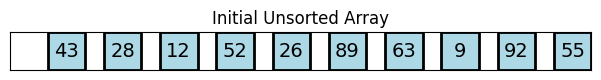


Performing Linear Search...


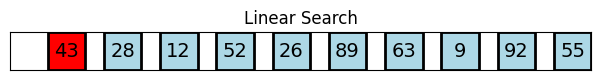

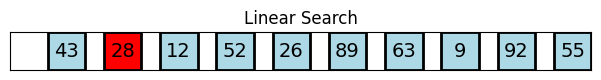

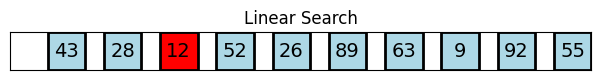

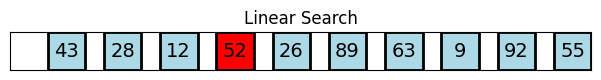

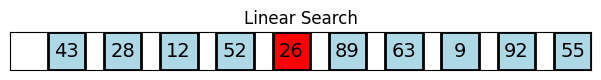

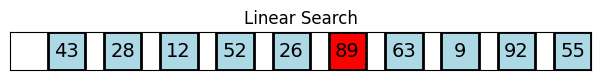

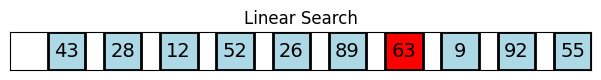

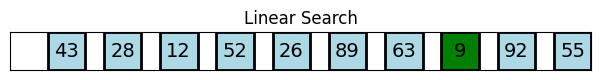

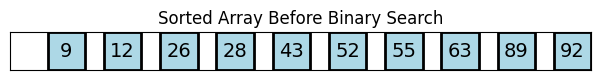


Performing Binary Search...


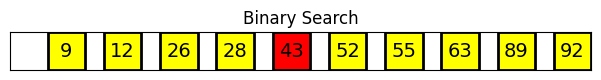

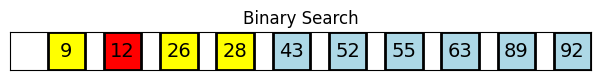

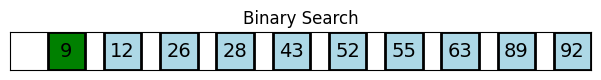


Search Results:
Linear Search: Found at index 7
Binary Search: Found at index 0


In [3]:
import time
import random
import matplotlib.pyplot as plt

def linear_search_visualized(array, target):
    """Performs and visualizes linear search step by step."""
    for index, value in enumerate(array):
        found = value == target
        visualize_search(array, index, found, "Linear Search")
        if found:
            return index
    return -1

def binary_search_visualized(array, target):
    """Performs and visualizes binary search step by step, highlighting searched half."""
    left, right = 0, len(array) - 1
    while left <= right:
        mid = (left + right) // 2
        found = array[mid] == target
        visualize_search(array, mid, found, "Binary Search", left, right)
        if found:
            return mid
        elif array[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def visualize_search(array, current_index, found, title, left=None, right=None):
    """Visualizes search process for Linear and Binary Search, highlighting the searched half."""
    square_size = 0.5
    spacing = 0.25
    plt.figure(figsize=(len(array) * (square_size + spacing), 0.5))

    for i, value in enumerate(array):
        x = i * (square_size + spacing)
        if left is not None and right is not None and left <= i <= right:
            color = "yellow"  # Highlight the searched half
        else:
            color = "lightblue"

        if i == current_index:
            color = "green" if found else "red"

        plt.gca().add_patch(plt.Rectangle((x, 0), square_size, square_size, color=color, ec="black", lw=2))
        plt.text(x + square_size / 2, square_size / 2, str(value), ha="center", va="center", fontsize=14, color="black")

    plt.xlim(-0.5, len(array) * (square_size + spacing) - spacing)
    plt.ylim(0, square_size)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()
    time.sleep(0.5)

# Generate random array
array = random.sample(range(1, 101), 10)

# Plot initial array
visualize_search(array, -1, False, "Initial Unsorted Array")

# Get user input for target
while True:
    try:
        target = int(input("Enter a target number: "))
        break
    except ValueError:
        print("Invalid input. Enter a number.")

# Perform Linear Search
print("\nPerforming Linear Search...")
linear_result = linear_search_visualized(array, target)

# Sort array before performing Binary Search
sorted_array = sorted(array)
visualize_search(sorted_array, -1, False, "Sorted Array Before Binary Search")

# Perform Binary Search
print("\nPerforming Binary Search...")
binary_result = binary_search_visualized(sorted_array, target)

# Print results
print("\nSearch Results:")
print(f"Linear Search: {'Found at index ' + str(linear_result) if linear_result != -1 else 'Not Found'}")
print(f"Binary Search: {'Found at index ' + str(binary_result) if binary_result != -1 else 'Not Found'}")
